In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [41]:
def pre_process(df):
    df.dropna(subset=['title'], inplace=True)

 该函数为数据预处理函数，在本次比赛中，只担负了消去Nan值的任务。

In [ ]:
def static_click_count(df):
    '''
    :param df: dataframe use to statistic
    :return:
    '''
    df['assemble'] = df['prefix'] + ' ' + df['title'] + ' ' + df['type']
    df_click = df.loc[df['click'] == 1, :].groupby('assemble', as_index=False)
    df_noclick = df.loc[df['click'] == 0, :].groupby('assemble', as_index=False)
    click = df_click.count().loc[:, ['assemble', 'click']]
    unclick = df_noclick.count().loc[:, ['assemble', 'click']]
    result = pd.merge(click, unclick, how='outer', on=['assemble', 'assemble'])
    result.rename(columns={'click_x': 'enclick', 'click_y': 'unclick'}, inplace=True)
    result.fillna(0, inplace=True)
    result['rate'] = result['enclick'] / (result['enclick'] + result['unclick'])
    result['total'] = result['enclick'] + result['unclick']
    return result

该函数以prefix，title，type合并，将之做为标签，来统计该标签的点击情况。
返回的参数为Datafram格式，拥有的列为：assemble（prefix + title + type），enclick (记录出现后被点击的次数)，unclick (记录出现后未被点击的次数)，total（记录总点击的次数），rate（记录点击率）

In [ ]:
def click_count_assemble(test_df, statistic):
    test_df['assemble'] = test_df['prefix'] + ' ' + test_df['title'] + ' ' + test_df['type']
    test_result = pd.merge(test_df, statistic, left_on='assemble', right_on='assemble', how='left')
    test_result = test_result.loc[:, ['assemble', 'enclick', 'unclick', 'total', 'rate']]
    return test_result

 该函数为数据预处理函数，在本次比赛中，只担负了消去Nan值的任务。

In [ ]:
def static_predict(train, test, thres):
    pre_process(train)
    statistic_result = static_click_count(train)
    test_result = click_count_assemble(test, statistic_result)
    test_result.fillna(0, inplace=True)
    rate = test_result.loc[:,'rate']
    predict_CTB = (rate > thres).values
    return test_result, predict_CTB

 该函数为数据预处理函数，在本次比赛中，只担负了消去Nan值的任务。

In [79]:
test_df = pd.read_csv('..\data\oppo_train_valt_est_csv\oppo_round1_test_A_20180929.csv', encoding='UTF-8')
train_df = pd.read_csv('..\data\oppo_train_valt_est_csv\oppo_round1_train_20180929.csv', encoding='UTF-8')
vali_df = pd.read_csv('..\data\oppo_train_valt_est_csv\oppo_round1_vali_20180929.csv', encoding='UTF-8')

In [80]:
vali_true = vali_df.loc[:, 'click']
true_CTB = np.where(true.values==1, True, False)

In [91]:
thres = 0.5
test_predict, predict_CTB = static_predict(train_df, vali_df, thres)

# Analysis Part

In [93]:
is_right = ~(predict_CTB^true_CTB)
print(is_right.sum())
test_predict['is_right'] = is_right

31415


D:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


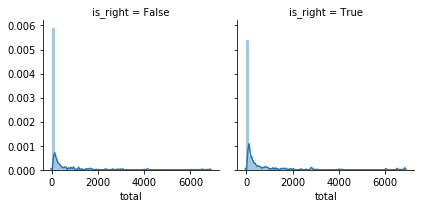

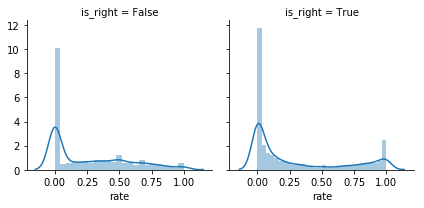

In [57]:
g = sns.FacetGrid(test_predict, col='is_right')
g = g.map(sns.distplot, "total")

g = sns.FacetGrid(test_predict, col='is_right')
g = g.map(sns.distplot, "rate")
plt.show()